# Dashboard - Udemy courses price choice
### Allison Pessoa,  
February, 2023

Databases stored in BigQuery data warehouse from GCP (Google Cloud Platform).

In [1]:
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"/home/allison/Dropbox/4_Projetos/Projetos em andamento/DataScience/SQL/sql-intro-377515-4dad46fe0b4f.json"

client = bigquery.Client()

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(palette="flare")

## Udemy courses

### A global look into the data

In [81]:
query_string = """ 

SELECT *
FROM `sql-intro-377515.mooc.udemy-new`
LIMIT 5

"""

df_global = client.query(query_string).to_dataframe()
df_global.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,2551621.0,Implementing SAP BPC Embedded 11,True,29.99,Learn how to use SAP BPC11/BI-IP and BPC Embed...,228.0,3.90,56.0,10.0,18.0,156.0,2019-10-23 00:50:47+00:00,2019-10-21,Office Productivity,SAP,None,English,/course/implementing-sap-bpc-embedded-11/,Marc Schindler,/user/marc-schindler/
1,4360354.0,Texts SAP Certified Technology Associate – C_T...,True,19.99,SAP Certified Technology Associate – System Ad...,937.0,5.00,1.0,1.0,0.0,0.0,2021-12-04 12:56:58+00:00,2021-12-04,Office Productivity,SAP,None,English,/course/sap-certified-technology-associate-c_t...,Julio Garcia,/user/julio-garcia-9/
2,2847602.0,SAP y SAP B1 principiantes.,False,0.00,Primeros pasos SAP y SAP B1.,2851.0,3.78,204.0,51.0,5.0,43.0,2020-05-19 18:03:28+00:00,2020-03-02,Office Productivity,SAP,ERP,Spanish,/course/sap-y-sap-b1-principiantes/,Rafael Flores Ramírez,/user/rafael-flores-ramirez-3/
3,491596.0,SAP Evaluated Receipt Settlement -ERS,True,94.99,Back end Setting( SPRO configuration) & Front ...,445.0,3.75,18.0,6.0,21.0,52.0,2015-05-04 20:07:08+00:00,2015-05-02,Office Productivity,SAP,ERS,English,/course/sap-evaluated-receipt-settlement-ers/,Sumit Jain,/user/sumitjain5/
4,36198.0,SAP - SAP Basis and SAP Netweaver complete Tra...,True,49.99,Everything you wanted to know about SAP Basis....,2930.0,3.25,404.0,107.0,47.0,263.0,2013-04-09 18:27:53+00:00,2013-04-22,Office Productivity,SAP,SAP,English,/course/sap-basis-training/,SAP Training Now & OJAYO SAP education university,/user/jaydhruv/


In [83]:
df_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  5 non-null      float64            
 1   title               5 non-null      object             
 2   is_paid             5 non-null      boolean            
 3   price               5 non-null      float64            
 4   headline            5 non-null      object             
 5   num_subscribers     5 non-null      float64            
 6   avg_rating          5 non-null      float64            
 7   num_reviews         5 non-null      float64            
 8   num_comments        5 non-null      float64            
 9   num_lectures        5 non-null      float64            
 10  content_length_min  5 non-null      float64            
 11  published_time      5 non-null      datetime64[ns, UTC]
 12  last_update_date    5 non-null      dbda

### Google Trends

In [242]:
df_udemy_trends = pd.read_csv("google_trends_udemy.csv", header=1)
df_udemy_trends = df_udemy_trends.replace(to_replace='<1', value=0)
df_udemy_trends['value'] = pd.to_numeric(df_udemy_trends['udemy: (Worldwide)'])
df_udemy_trends

,Month,udemy: (Worldwide),value
0,2011-01,0,0
1,2011-02,0,0
2,2011-03,0,0
3,2011-04,0,0
4,2011-05,0,0
...,...,...,...
137,2022-06,89,89
138,2022-07,96,96
139,2022-08,92,92
140,2022-09,84,84


In [247]:
np.arange(2011,2023,1)

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

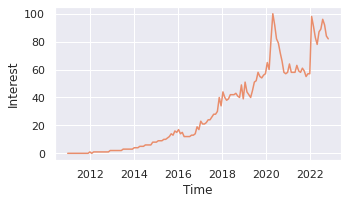

In [255]:
fig, ax = plt.subplots(figsize=(5,3))
ax.plot(np.linspace(2011,2022.83,df_udemy_trends.shape[0]), df_udemy_trends['value'])
ax.set_xlabel('Time')
ax.set_ylabel('Interest')
fig.tight_layout()
fig.savefig('market_tendency.png', dpi=400)

### Language distribution

In [94]:
query_pie = """ 
                SELECT language, COUNT(1) AS number_courses
                FROM `sql-intro-377515.mooc.udemy-new`
                GROUP BY language
"""

df_pie = client.query(query_pie).to_dataframe()

In [95]:
df_pie = df_pie.sort_values(by=['number_courses'], ascending=False)
new_df_pie = df_pie[0:5].copy()
new_df_pie = new_df_pie.append({'language':'Other', 
                                'number_courses': df_pie['number_courses'].sum() - new_df_pie['number_courses'].sum()},
                              ignore_index = True)
new_df_pie.to_csv('language_distribution.csv')

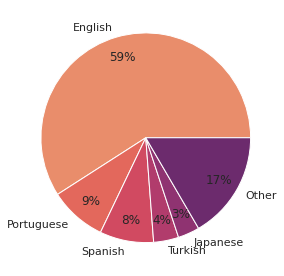

In [123]:
fig, ax = plt.subplots()
pie = ax.pie(new_df_pie.number_courses, labels=new_df_pie.language,
             autopct='%1.0f%%',
             pctdistance=0.8,
             labeldistance = 1.1)
fig.tight_layout()

### Price distribution

In [132]:
query_hist_full = """ 
                SELECT price
                FROM `sql-intro-377515.mooc.udemy-new`
                """

df_price = client.query(query_hist_full).to_dataframe()

In [142]:
df_price_paid = df_price[df_price['price'] > 0]
df_price_paid_under_200 = df_price_paid[df_price_paid['price'] < 200]

print("Total Courses: ", df_price.shape[0])
print("Total Paid Courses: ", df_price_paid.shape[0])
print("Total Paid Courses under $200: ", df_price_paid_under_200.shape[0])

Total Courses:  209734
Total Paid Courses:  187996
Total Paid Courses under $200:  176305


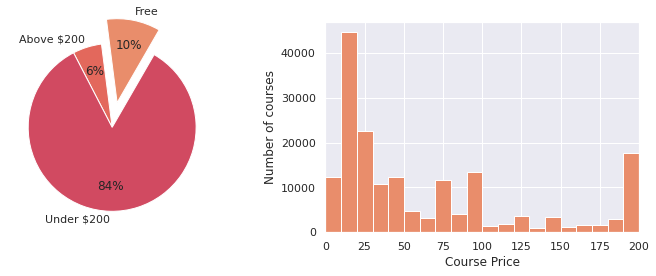

In [256]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
pie = ax[0].pie([df_price.shape[0] - df_price_paid.shape[0], 
              df_price_paid.shape[0] - df_price_paid_under_200.shape[0], 
              df_price_paid_under_200.shape[0]], 
             labels=["Free", "Above $200", "Under $200"], 
             autopct='%1.0f%%',
             pctdistance=0.7,
             labeldistance = 1.1,
             startangle=60,
             explode = [0.3, 0, 0])

hist = ax[1].hist(df_price_paid.price, bins=100)
#ax.set_xscale('log')
ax[1].set_xlim([0,200])
ax[1].set_xlabel('Course Price')
ax[1].set_ylabel('Number of courses')

fig.tight_layout()
fig.savefig('price_distribution.png', dpi=400)

### In general, how likely is for a student to enroll in a course depending on the price

In [196]:
query_string = """ 
                WITH buffer AS 
                    (
                    SELECT  price, 
                            SUM(num_subscribers) AS cul_sub, 
                            SUM(content_length_min) AS cul_content, 
                            COUNT(1) AS number_of_courses,
                    FROM `sql-intro-377515.mooc.udemy-new`
                    GROUP BY price
                    )
                SELECT *, cul_sub*price/number_of_courses AS av_money,
                          cul_sub/number_of_courses AS av_subscribers,
                          cul_content/number_of_courses AS av_content_duration
                FROM buffer
"""

df_enrollment = client.query(query_string).to_dataframe()

In [197]:
df_enrollment.head()

,price,cul_sub,cul_content,number_of_courses,av_money,av_subscribers,av_content_duration
0,29.99,18953497.0,1923777.0,9840,57765.790145,1926.168394,195.505793
1,19.99,87998455.0,8702861.0,43536,40405.391296,2021.280205,199.900335
2,0.00,154226018.0,1992488.0,21738,0.000000,7094.765756,91.659214
3,94.99,8861277.0,610922.0,2196,383302.687719,4035.189891,278.197632
4,49.99,21725098.0,2350291.0,9789,110944.698030,2219.337828,240.095107


In [205]:
df_enrollment = df_enrollment.sort_values(by="price", ascending=True)

df_enrollment['SMA_money'] = df_enrollment['av_money'].rolling(3).mean()
df_enrollment['SMA_subscribers'] = df_enrollment['av_subscribers'].rolling(3).mean()
df_enrollment['SMA_content'] = df_enrollment['av_content_duration'].rolling(3).mean()

df_enrollment

,price,cul_sub,cul_content,number_of_courses,av_money,av_subscribers,av_content_duration,SMA_money,SMA_subscribers,SMA_content
2,0.00,154226018.0,1992488.0,21738,0.000000e+00,7094.765756,91.659214,NaN,NaN,NaN
83,0.10,19320.0,39686.0,227,8.511013e+00,85.110132,174.828194,NaN,NaN,NaN
154,0.11,4614.0,13868.0,34,1.492765e+01,135.705882,407.882353,7.812887e+00,2438.527257,224.789920
71,0.20,9085.0,24611.0,115,1.580000e+01,79.000000,214.008696,1.307955e+01,99.938672,265.573081
73,0.30,7475.0,13351.0,53,4.231132e+01,141.037736,251.905660,2.434632e+01,118.581206,291.265570
...,...,...,...,...,...,...,...,...,...,...
159,899.99,131618.0,43805.0,79,1.499429e+06,1666.050633,554.493671,1.187000e+06,1321.475752,502.658063
90,949.00,358914.0,12930.0,46,7.404552e+06,7802.478261,281.086957,3.628187e+06,3890.539934,439.829906
46,990.00,5475.0,16924.0,88,6.159375e+04,62.215909,192.318182,2.988525e+06,3176.914934,342.632936
33,999.00,281559.0,91031.0,312,9.015303e+05,902.432692,291.766026,2.789225e+06,2922.375621,255.057055


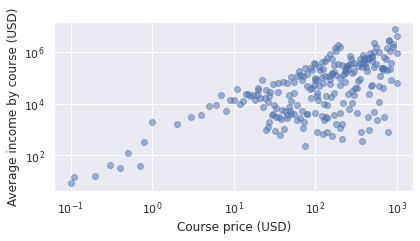

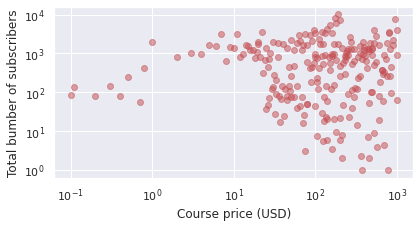

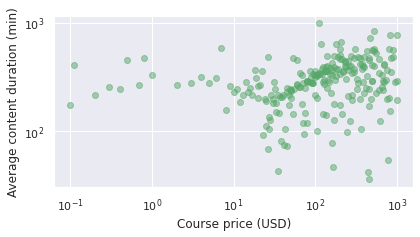

In [257]:
fig, ax = plt.subplots(figsize=(6,10/3))
ax.scatter(df_enrollment['price'], df_enrollment['av_money'], color='b', alpha=0.5)
#ax[0].plot(df_enrollment[df_enrollment['SMA_money'].notna()]['price'], \
#           df_enrollment[df_enrollment['SMA_money'].notna()]['SMA_money'], color='b')
ax.set_ylabel('Average income by course (USD)')
ax.set_xlabel('Course price (USD)')
ax.set_yscale('log')
ax.set_xscale('log')
fig.tight_layout()
fig.savefig('average_income.png', dpi=400)

fig, ax = plt.subplots(figsize=(6,10/3))
ax.scatter(df_enrollment['price'], df_enrollment['av_subscribers'], color='r', alpha=0.5)
#ax[1].plot(df_enrollment[df_enrollment['SMA_subscribers'].notna()]['price'], \
#           df_enrollment[df_enrollment['SMA_subscribers'].notna()]['SMA_subscribers'], color='r')
ax.set_ylabel('Total bumber of subscribers')
ax.set_yscale('log')
ax.set_xlabel('Course price (USD)')
ax.set_xscale('log')
fig.tight_layout()
fig.savefig('average_enrollment.png', dpi=400)

fig, ax = plt.subplots(figsize=(6,10/3))
ax.scatter(df_enrollment['price'], df_enrollment['av_content_duration'], color='g', alpha=0.5)
#ax[2].plot(df_enrollment[df_enrollment['SMA_content'].notna()]['price'], \
#           df_enrollment[df_enrollment['SMA_content'].notna()]['SMA_content'], color='g')
ax.set_ylabel('Average content duration (min)')
ax.set_xlabel('Course price (USD)')
ax.set_yscale('log')
ax.set_xscale('log')
fig.tight_layout()
fig.savefig('average_duration.png', dpi=400)